## INTRODUCTION
- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - Deep learning research platform that provides maximum flexibility and speed
- pros: 
    - Iinteractively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
    - Clean support for dynamic graphs
    - Organizational backing from Facebook
    - Blend of high level and low level APIs
- cons:
    - Much less mature than alternatives
    - Limited references / resources outside of the official documentation
- I accept you know neural network basics. If you do not know check my tutorial. Because I will not explain neural network concepts detailed, I only explain how to use pytorch for neural network
- Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners 
- The most important parts of this tutorial from matrices to ANN. If you learn these parts very well, implementing remaining parts like CNN or RNN will be very easy. 
<br>
<br>**Content:**
1. Basics of Pytorch, Linear Regression, Logistic Regression, Artificial Neural Network (ANN), Concolutional Neural Network (CNN)
    - https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/code
1. [Recurrent Neural Network (RNN)](#1)
1. Long-Short Term Memory (LSTM)
    - https://www.kaggle.com/kanncaa1/long-short-term-memory-with-pytorch

<a id="1"></a> <br>
### Recurrent Neural Network (RNN)
- RNN is essentially repeating ANN but information get pass through from previous non-linear activation function output.
- **Steps of RNN:**
    1. Import Libraries
    1. Prepare Dataset
    1. Create RNN Model
        - hidden layer dimension is 100
        - number of hidden layer is 1 
    1. Instantiate Model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv']


In [41]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable # 요즘엔 Variable 사용 안함. 그냥 torch.tensor쓰면 알아서 autograd 모드 사용됨
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [42]:
# Prepare Dataset
# load data
train = pd.read_csv(r"../input/train.csv",dtype = np.float32)

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:


# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values # label 열에 대한 values들을 전부 나열 # ''로 묶지않고 그냥 열의 이름 그대로 작성
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization # label열을 제외한 모든 feature값([:]로 파악)을 모든 행과 label이 아닌 열로 location해서 그 값들을 255로 전부 나눈 값

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) #train_test_split은 sklearn의 함수로 데이터 세트를 훈련세트와 테스트 세트로 나

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long
print(targets_numpy)
print(features_numpy)
print(features_train.shape)
print(targetsTrain.shape)



[1. 0. 1. ... 7. 6. 9.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(33600, 784)
torch.Size([33600])


In [44]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size) #len(feature_train)은 총 샘플 수 batch_size 는 모델에 공급되는 샘플 수 이므로 모델에 공급되는 샘플수를 총 샘플수만큼 데이터를 뽑으려면 그만큼 iteration을 해야 한 세트가 됨. 즉 총 iter에서 all/sample을 나눠줘야 총 epochs가 나옴. 1epoch이 all/sample이라는 말임.
num_epochs = int(num_epochs)
print(num_epochs)
print((len(features_train)))
print(int(n_iters / len(features_train) / batch_size))

29
33600
0


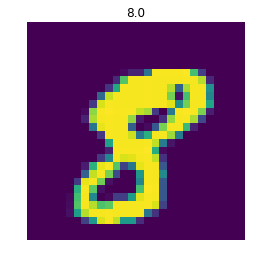

In [45]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)

# data loader # data loader은 데이터셋을 배치 단위로 효율적으로 로드하는 역할을 한다. 3000개의 sample이 있다면 여기에선 batch size가 100이므로 100개씩 나눠서 dataset을 정렬하고 shuffle이 false이므로 입력 순서대로 데이터를 가져온다.
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [46]:
# Create RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim): #ANN과 다르게 RNN 함수는 layer_dim(RNN layer의 갯수)까지 가지고 있음
        super(RNNModel, self).__init__()
        #input_dim과 output_dim의 속성 설정이 없는 이유(self.)는 nn.Module안에 이미 다 들어있기 때문
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim 
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu') #텐서의 첫 차원이 batch_first의 크기라는것을 의미하고 활성화 함수는 relu
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)) #마찬가지로 variable 사용 안하며 RNN의 첫 은닉 상태를 명시한뒤 순전파 하는 과정을 담은 함수임 x.size(0)은 h0의 배치 크기를 의미
            
        # One time step
        out, hn = self.rnn(x, h0) # hn은 마지막 타임프탬프의 은닉 상태
        out = self.fc(out[:, -1, :]) #(batch_size, output_dim)
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 8000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 10   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim) #모델 인스턴스 생성

# Cross Entropy Loss 
error = nn.CrossEntropyLoss() #logistic function?

# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [47]:
seq_dim = 28  
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train  = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels )
            
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 250 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data[0], accuracy))

Iteration: 500  Loss: 2.3067374229431152  Accuracy: 9.988095238095237 %
Iteration: 1000  Loss: 2.2157537937164307  Accuracy: 16.88095238095238 %
Iteration: 1500  Loss: 2.4107158184051514  Accuracy: 10.821428571428571 %
Iteration: 2000  Loss: 1.2927007675170898  Accuracy: 54.82142857142857 %
Iteration: 2500  Loss: 0.9310961961746216  Accuracy: 72.6547619047619 %
Iteration: 3000  Loss: 0.42511340975761414  Accuracy: 82.91666666666667 %
Iteration: 3500  Loss: 0.4347256124019623  Accuracy: 85.14285714285714 %
Iteration: 4000  Loss: 0.23157165944576263  Accuracy: 89.71428571428571 %
Iteration: 4500  Loss: 0.5805299282073975  Accuracy: 87.01190476190476 %
Iteration: 5000  Loss: 0.4021262228488922  Accuracy: 90.28571428571429 %
Iteration: 5500  Loss: 0.4530852138996124  Accuracy: 88.75 %
Iteration: 6000  Loss: 0.35145577788352966  Accuracy: 88.36904761904762 %
Iteration: 6500  Loss: 0.130189910531044  Accuracy: 93.61904761904762 %
Iteration: 7000  Loss: 0.2692749500274658  Accuracy: 92.464285

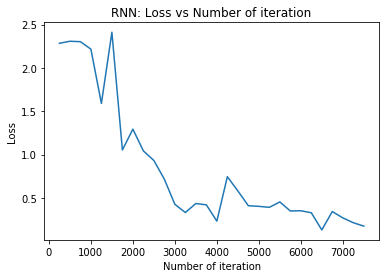

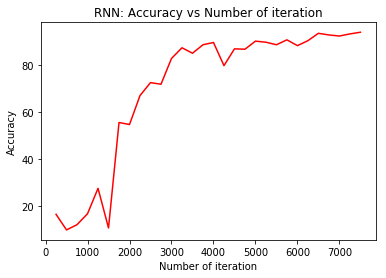

In [48]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("RNN: Accuracy vs Number of iteration")
plt.savefig('graph.png')
plt.show()

### Conclusion
In this tutorial, we learn: 
1. Basics of pytorch
1. Linear regression with pytorch
1. Logistic regression with pytorch
1. Artificial neural network with with pytorch
1. Convolutional neural network with pytorch
    - https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/code
1. Recurrent neural network with pytorch
1. Long-Short Term Memory (LSTM)
    - https://www.kaggle.com/kanncaa1/long-short-term-memory-with-pytorch

<br> If you have any question or suggest, I will be happy to hear it 